In [1]:
import os
import sys
sys.path.append('/Users/aghavamp/Desktop/Projects')
sys.path.append('/Users/aghavamp/Desktop/Projects/Functional_Fusion')
sys.path.append('/Users/aghavamp/Desktop/Projects/SUITPy')
import getpass
import importlib
import tqdm

import scipy.io as sio
import rsatoolbox as rsa
from rsatoolbox.io import spm as spm_io
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import surfAnalysisPy as surf
import SUITPy as suit
import nibabel as nb
import nitools as nt
from matplotlib.cm import ScalarMappable
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from pathlib import Path
import seaborn as sns
import PcmPy as pcm
import Functional_Fusion.atlas_map as am
import Functional_Fusion.reliability as rel
import glob
import matplotlib.patches as patches
from nilearn.plotting.cm import _cmap_d as nilearn_cmaps

# SET PATHS:
baseDir = os.path.join('/Users', getpass.getuser(), 'Desktop', 'Projects', 'bimanual_wrist', 'data', 'fMRI')
bidsDir = 'BIDS'
anatomicalDir = 'anatomicals'
freesurferDir = 'surfaceFreesurfer'
surfacewbDir = 'surfaceWB' 
behavDir = 'behavioural'
regDir = 'ROI'
atlasDir = '/Volumes/diedrichsen_data$/data/Atlas_templates/fs_LR_32'
analysisDir = os.path.join(os.path.dirname(os.path.dirname(baseDir)), 'analysis')



## wb_view subject space

In [22]:
import subprocess

sn = 102

names = ['mvpa_lhand', 'mvpa_rhand', 'mvpa_bi', 'marginal_lhand', 'marginal_rhand']
hem = ['L', 'R']

# add paths:
paths = []
# add surface files:
for h in hem:
    paths.append(os.path.abspath(os.path.join(baseDir, surfacewbDir, f's{sn}', f's{sn}.{h}.inflated.32k.surf.gii')))

# add searchlight results:
for h in hem:
    for name in names:
        paths.append(os.path.abspath(os.path.join(baseDir, 'searchlight', f'{name}_s{sn}_{h}_cortex.dscalar.nii')))


# Run wb_view:
subprocess.run(['wb_view', *paths])





Info: Resources loaded:
   :/About   :/BalsaUploadDialog   :/Cursor   :/DingOntology   :/Fonts   :/general_resources.qrc   :/help_resources.qrc   :/HelpFiles   :/LayersPanel   :/MessageDialog   :/PaletteEditorDialog   :/PaletteSettings   :/qpdf   :/qt-project.org   :/RecentFilesDialog   :/SceneFileDialog   :/SpecFileDialog   :/Splash   :/ToolBar   :/update_resources.sh


Info: Time to read /Users/aghavamp/Desktop/Projects/bimanual_wrist/data/fMRI/surfaceWB/s102/s102.L.inflated.32k.surf.gii was 0.028553 seconds.


Info: Time to read /Users/aghavamp/Desktop/Projects/bimanual_wrist/data/fMRI/surfaceWB/s102/s102.R.inflated.32k.surf.gii was 0.026569 seconds.


Info: Time to read /Users/aghavamp/Desktop/Projects/bimanual_wrist/data/fMRI/searchlight/mvpa_lhand_s102_L_cortex.dscalar.nii was 0.00514 seconds.


Info: Time to read /Users/aghavamp/Desktop/Projects/bimanual_wrist/data/fMRI/searchlight/mvpa_rhand_s102_L_cortex.dscalar.nii was 0.00266 seconds.


Info: Time to read /Users/aghavamp/De

CompletedProcess(args=['wb_view', '/Users/aghavamp/Desktop/Projects/bimanual_wrist/data/fMRI/surfaceWB/s102/s102.L.inflated.32k.surf.gii', '/Users/aghavamp/Desktop/Projects/bimanual_wrist/data/fMRI/surfaceWB/s102/s102.R.inflated.32k.surf.gii', '/Users/aghavamp/Desktop/Projects/bimanual_wrist/data/fMRI/searchlight/mvpa_lhand_s102_L_cortex.dscalar.nii', '/Users/aghavamp/Desktop/Projects/bimanual_wrist/data/fMRI/searchlight/mvpa_rhand_s102_L_cortex.dscalar.nii', '/Users/aghavamp/Desktop/Projects/bimanual_wrist/data/fMRI/searchlight/mvpa_bi_s102_L_cortex.dscalar.nii', '/Users/aghavamp/Desktop/Projects/bimanual_wrist/data/fMRI/searchlight/marginal_lhand_s102_L_cortex.dscalar.nii', '/Users/aghavamp/Desktop/Projects/bimanual_wrist/data/fMRI/searchlight/marginal_rhand_s102_L_cortex.dscalar.nii', '/Users/aghavamp/Desktop/Projects/bimanual_wrist/data/fMRI/searchlight/mvpa_lhand_s102_R_cortex.dscalar.nii', '/Users/aghavamp/Desktop/Projects/bimanual_wrist/data/fMRI/searchlight/mvpa_rhand_s102_R_co

## surf plot MPVA

/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_27262/2528035089.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_27262/2528035089.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_27262/2528035089.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_27262/2528035089.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_27262/2528035089.py:52: UserWarning: This figure includes Axes that are n

KeyboardInterrupt: 

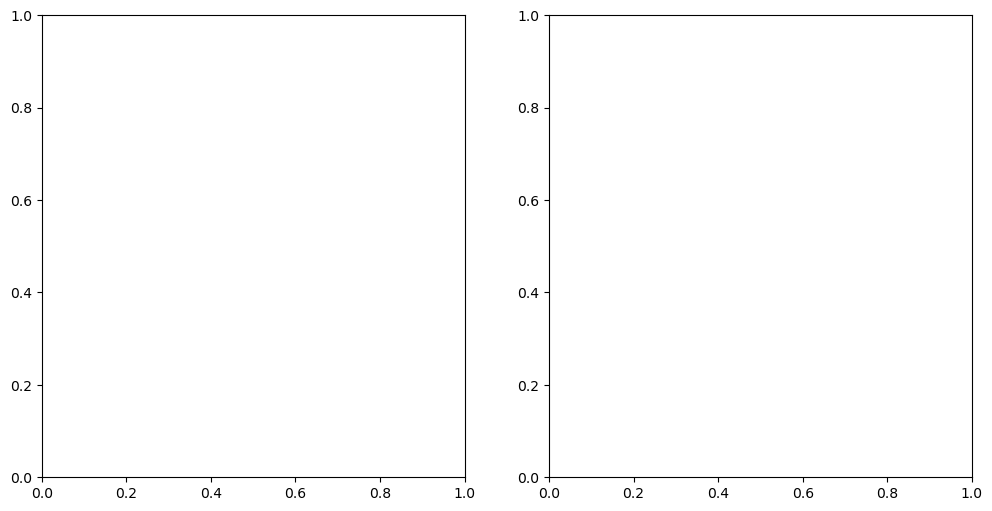

In [ ]:
participants = [101,102,103,106,108,109,110,111,112,113,114,115]
cmap = 'bwr'
tmax = 97
searchlight_names = ['marginal_lhand', 'marginal_rhand', 'mvpa_lhand', 'mvpa_rhand', 'mvpa_bi']

borders = {'L': '/Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh/fs_L/fs_LR.32k.L.border',
           'R': '/Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh/fs_R/fs_LR.32k.R.border'}

for searchlight_name in searchlight_names:
    for _, sn in enumerate(participants):
        Hem = ['L', 'R']
        D = {'L': np.zeros((32492)), 'R': np.zeros((32492))}
        for h in Hem:
            file = os.path.join(baseDir, 'searchlight', f'{searchlight_name}_s{sn}_{h}_cortex.dscalar.nii')  
            cifti_img = nb.load(file)
            data = cifti_img.get_fdata()
            header = cifti_img.header
            scalar_axis = header.get_axis(1)
            vertex_indices = scalar_axis.vertex

            D[h][vertex_indices] = data[0]
        
        # Combine data from both hemispheres
        all_data = np.concatenate([D['L'].flatten(), D['R'].flatten()])
        # Use percentiles
        vmax = np.nanpercentile(all_data, tmax)
        vmin = -vmax
        
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        for ax, H in zip(axs, Hem):
            plt.sca(ax)
            surf.plot.plotmap(D[H], f'fs32k_{H}',
                                underlay=None,
                                borders=borders[H],
                                cscale=[vmin, vmax],
                                cmap=cmap,
                                underscale=[-1.5, 1],
                                alpha=.5,
                                new_figure=False,
                                colorbar=False,
                                # frame=[xlim[0], xlim[1], ylim[0], ylim[1]]
                                )
        # make colorbar
        norm = plt.Normalize(vmin=vmin, vmax=vmax)
        sm = ScalarMappable(norm=norm, cmap=cmap)
        cbar = fig.colorbar(sm, ax=[axs[0], axs[1]], orientation='horizontal', fraction=0.03)
        cbar.set_label('avg distance')

        axs[0].set_title('Left hemisphere')
        axs[1].set_title('Right hemisphere')
        fig.suptitle(f'searchlight {searchlight_name}, s{sn}')
        fig.tight_layout()
        plt.savefig(f'../figures/glmsingle/searchlight/{searchlight_name}_s{sn}.pdf', bbox_inches="tight")
        plt.close()



## surf plot sanity (avg beta)

In [ ]:
participants = [101,102,103,106,108,109,110,111,112,113,114,115]
cmap = 'bwr'
tmax = 99.5
searchlight_names = ['lhand', 'rhand', 'bi']

borders = {'L': '/Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh/fs_L/fs_LR.32k.L.border',
           'R': '/Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh/fs_R/fs_LR.32k.R.border'}

for searchlight_name in searchlight_names:
    for _, sn in enumerate(participants):
        Hem = ['L', 'R']
        D = {'L': np.zeros((32492)), 'R': np.zeros((32492))}
        for h in Hem:
            file = os.path.join(baseDir, 'searchlight', f'{searchlight_name}_s{sn}_{h}_cortex.dscalar.nii')  
            cifti_img = nb.load(file)
            data = cifti_img.get_fdata()
            header = cifti_img.header
            scalar_axis = header.get_axis(1)
            vertex_indices = scalar_axis.vertex

            D[h][vertex_indices] = data[0]
        
        # Combine data from both hemispheres
        all_data = np.concatenate([D['L'].flatten(), D['R'].flatten()])
        # Use percentiles
        vmax = np.nanpercentile(all_data, tmax)
        vmin = -vmax
        
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        for ax, H in zip(axs, Hem):
            plt.sca(ax)
            surf.plot.plotmap(D[H], f'fs32k_{H}',
                                underlay=None,
                                borders=borders[H],
                                cscale=[vmin, vmax],
                                cmap=cmap,
                                underscale=[-1.5, 1],
                                alpha=.5,
                                new_figure=False,
                                colorbar=False,
                                # frame=[xlim[0], xlim[1], ylim[0], ylim[1]]
                                )
        # make colorbar
        norm = plt.Normalize(vmin=vmin, vmax=vmax)
        sm = ScalarMappable(norm=norm, cmap=cmap)
        cbar = fig.colorbar(sm, ax=[axs[0], axs[1]], orientation='horizontal', fraction=0.03)
        cbar.set_label('avg beta')

        axs[0].set_title('Left hemisphere')
        axs[1].set_title('Right hemisphere')
        fig.suptitle(f'searchlight {searchlight_name}, s{sn}')
        fig.tight_layout()
        plt.savefig(f'../figures/glmsingle/searchlight/{searchlight_name}_s{sn}.pdf', bbox_inches="tight")
        plt.close()



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_27262/3527150461.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_27262/3527150461.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_27262/3527150461.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_27262/3527150461.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_27262/3527150461.py:52: UserWarning: This figure includes Axes that are n